# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

`tmdb-movies.csv`:


| Column                   | Description                                                                                                   |
|--------------------------|---------------------------------------------------------------------------------------------------------------|
| `id`                     | Unique identifier for each movie.                                                                             |
| `imdb_id`                | Unique identifier for each movie on IMDB.                                                                     |
| `popularity`             | TMDB popularity score, indicating the movie's popularity on the platform.                                     |
| `budget`                 | Budget allocated for producing the movie, in US dollars.                                                      |
| `revenue`                | Revenue generated by the movie, in US dollars.                                                                |
| `original_title`         | Original title of the movie in its primary language.                                                          |
| `cast`                   | List of actors featured in the movie.                                                                         |
| `homepage`               | URL for the official homepage of the movie.                                                                   |
| `director`               | Director(s) of the movie, usually extracted from the crew information.                                        |
| `tagline`                | A short tagline or catchphrase associated with the movie.                                                     |
| `keywords`               | List of keywords associated with the movie (e.g., "alien invasion", "time travel").                           |
| `overview`               | Brief description of the movie's plot.                                                                        |
| `runtime`                | Duration of the movie in minutes.                                                                             |
| `genres`                 | List of genres associated with the movie (e.g., Action, Comedy).                                              |
| `production_companies`   | List of companies involved in producing the movie.                                                            |
| `release_date`           | Date when the movie was released.                                                                             |
| `vote_count`             | Number of votes received by the movie on TMDB.                                                                |
| `vote_average`           | Average vote rating given to the movie on TMDB (scale of 0 to 10).                                            |
| `release_year`           | The year of release.                                                                                          |
| `budget_adj `            | Budget in terms of 2010 dollars accounting for inflation over time.                                           |
| `revenue_adj`            | Revenue in terms of 2010 dollars accounting for inflation over time.                                          |


### Question(s) for Analysis
* Does the year of release have an impact on runtime?
* Does the runtime have an impact on popularity?

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load the data
movies_df = pd.read_csv('tmdb-movies.csv')

##### Investigating `movies_df` 

In [3]:
# Show the shape of the df (rows, columns)
movies_df.shape

(10866, 21)

In [4]:
# Show the first 2 records in the df
movies_df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [5]:
# Exploring some statistics of the numeric values in the df
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# Exploring the data types of the columns in the df
movies_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
# Exploring the number of nan values in each column
movies_df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
# The percentage of the missing values in each column
movies_df.isna().sum()/movies_df.shape[0]*100

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

In [9]:
# Investigating the columns  
cols = movies_df.columns.to_list()
cols

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [10]:
# Re-arrange the columns in a more useful way to read the data
edited_cols = ['id',
 'imdb_id',
 'original_title',
 'genres',
 'release_year',
 'overview',
 'runtime',
 'cast',
 'director',
 'production_companies',
 'popularity',
 'budget',
 'revenue',
 'homepage',
 'release_date',
 'tagline',
 'keywords',
 'vote_count',
 'vote_average',
 'budget_adj',
 'revenue_adj']

movies_df = movies_df[edited_cols]
movies_df.head()

,id,imdb_id,original_title,genres,release_year,overview,runtime,cast,director,production_companies,...,budget,revenue,homepage,release_date,tagline,keywords,vote_count,vote_average,budget_adj,revenue_adj
0,135397,tt0369610,Jurassic World,Action|Adventure|Science Fiction|Thriller,2015,Twenty-two years after the events of Jurassic ...,124,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,...,150000000,1513528810,http://www.jurassicworld.com/,6/9/15,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,5562,6.5,1.379999e+08,1.392446e+09
1,76341,tt1392190,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,2015,An apocalyptic story set in the furthest reach...,120,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...,...,150000000,378436354,http://www.madmaxmovie.com/,5/13/15,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,6185,7.1,1.379999e+08,3.481613e+08
2,262500,tt2908446,Insurgent,Adventure|Science Fiction|Thriller,2015,Beatrice Prior must confront her inner demons ...,119,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wago...,...,110000000,295238201,http://www.thedivergentseries.movie/#insurgent,3/18/15,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,2480,6.3,1.012000e+08,2.716190e+08
3,140607,tt2488496,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,2015,Thirty years after defeating the Galactic Empi...,136,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,...,200000000,2068178225,http://www.starwars.com/films/star-wars-episod...,12/15/15,Every generation has a story.,android|spaceship|jedi|space opera|3d,5292,7.5,1.839999e+08,1.902723e+09
4,168259,tt2820852,Furious 7,Action|Crime|Thriller,2015,Deckard Shaw seeks revenge against Dominic Tor...,137,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Universal Pictures|Original Film|Media Rights ...,...,190000000,1506249360,http://www.furious7.com/,4/1/15,Vengeance Hits Home,car race|speed|revenge|suspense|car,2947,7.3,1.747999e+08,1.385749e+09


### Data Cleaning

#### Drop the columns with high percentage of missing values

* Since the `homepage` column has a high percentage of missing values (`72.98 %`), it will give a limited insight, so, it will be removed.

In [11]:
movies_df.drop('homepage', inplace=True, axis= 1)

### Filling some missing data with more appropriate values

In [ ]:
movies_df['director'].fillna('Unlisted Director',inplace=True)
movies_df['imdb_id'].fillna('Unlisted ID',inplace=True)
movies_df['tagline'].fillna('Unlisted Taglines',inplace=True)
movies_df['cast'].fillna('Unlisted Cast',inplace=True)
movies_df['keywords'].fillna('Unlisted Keywords',inplace=True)
movies_df['overview'].fillna('No Available Overview',inplace=True)
movies_df['genres'].fillna('Unlisted Genres',inplace=True)
movies_df['production_companies'].fillna('Unlisted Production Companies',inplace=True)

In [13]:
# Check the null values
movies_df.isna().sum()/movies_df.shape[0]*100

id                      0.0
imdb_id                 0.0
original_title          0.0
genres                  0.0
release_year            0.0
overview                0.0
runtime                 0.0
cast                    0.0
director                0.0
production_companies    0.0
popularity              0.0
budget                  0.0
revenue                 0.0
release_date            0.0
tagline                 0.0
keywords                0.0
vote_count              0.0
vote_average            0.0
budget_adj              0.0
revenue_adj             0.0
dtype: float64

In [14]:
# Check the unique values of releasing year
print(movies_df['release_year'].unique())

[2015 2014 1977 2009 2010 1999 2001 2008 2011 2002 1994 2012 2003 1997
 2013 1985 2005 2006 2004 1972 1980 2007 1979 1984 1983 1995 1992 1981
 1996 2000 1982 1998 1989 1991 1988 1987 1968 1974 1975 1962 1964 1971
 1990 1961 1960 1976 1993 1967 1963 1986 1973 1970 1965 1969 1978 1966]


In [15]:
def format_date(row):
    # Extract month, day, and the two-digit year from the 'dates' column
    month, day, year = row['release_date'].split('/')
    # Use the release_year instead of the two-digit year
    full_date = pd.to_datetime(f"{day}-{month}-{row['release_year']}", format='%d-%m-%Y')
    # Return the formatted date in DD-MM-YYYY format
    return full_date.strftime('%d-%m-%Y')


# Apply the function to each row in the dataframe
movies_df['release_date'] = movies_df.apply(format_date, axis=1)

print(movies_df[['release_year', 'release_date']])

       release_year release_date
0              2015   09-06-2015
1              2015   13-05-2015
2              2015   18-03-2015
3              2015   15-12-2015
4              2015   01-04-2015
...             ...          ...
10861          1966   15-06-1966
10862          1966   21-12-1966
10863          1966   01-01-1966
10864          1966   02-11-1966
10865          1966   15-11-1966

[10866 rows x 2 columns]


In [16]:
# Investigate duplicates
movies_df.duplicated().sum()

1

In [17]:
# Drop duplicates
movies_df.drop_duplicates(inplace=True)
movies_df.duplicated().sum()

0

In [18]:
# Count the number of movies with a runtime of 0 minutes
movies_df.query('runtime == 0').id.count()

31

In [19]:
# Count the number of movies where the director is listed as "Unlisted Director"
movies_df.query('director == "Unlisted Director"').id.count()

44

* Since we have small numbers of `0` values in `runtime` and `Unlisted Director` in `director` it won't make a huge impact if we dropped them.

In [20]:
# Drop the 0 values in runtime and Unlisted Director in director 
movies_df= movies_df[movies_df['director']!= "Unlisted Director"]
movies_df= movies_df[movies_df['runtime']!= 0]

In [21]:
# Count the number of movies where the director is listed as "Unlisted Director"
movies_df.query('director == "Unlisted Director"').id.count()

0

In [22]:
# Count the number of movies with a runtime of 0 minutes
movies_df.query('runtime == 0').id.count()

0

In [23]:
# Show the shape of the df (rows, columns)
movies_df.shape

(10792, 20)

<a id='eda'></a>

## Exploratory Data Analysis

### Research Question 1 (Does the year of release have an impact on runtime?)

In [24]:
# Create a new DataFrame with only the 'release_year' and 'runtime' columns from the original movies_df
year_runtime_df = movies_df[['release_year', 'runtime']].copy()
year_runtime_df

,release_year,runtime
0,2015,124
1,2015,120
2,2015,119
3,2015,136
4,2015,137
...,...,...
10861,1966,95
10862,1966,176
10863,1966,94
10864,1966,80


In [25]:
# Group the DataFrame by 'release_year' and calculate the mean of 'runtime' for each year
year_avg_runtime = year_runtime_df.groupby('release_year')['runtime'].mean()

# Reset the index of the grouped DataFrame to make 'release_year' a column again
year_avg_runtime = year_avg_runtime.reset_index()

# Sort the DataFrame by 'release_year' in ascending order
year_avg_runtime = year_avg_runtime.sort_values(by='release_year', ascending=True)

# Display the average runtime by release year
year_avg_runtime

,release_year,runtime
0,1960,110.656250
1,1961,119.419355
2,1962,124.343750
3,1963,111.323529
4,1964,109.214286
5,1965,118.171429
6,1966,106.891304
7,1967,106.230769
8,1968,107.282051
9,1969,106.580645


<Axes: xlabel='release_year'>

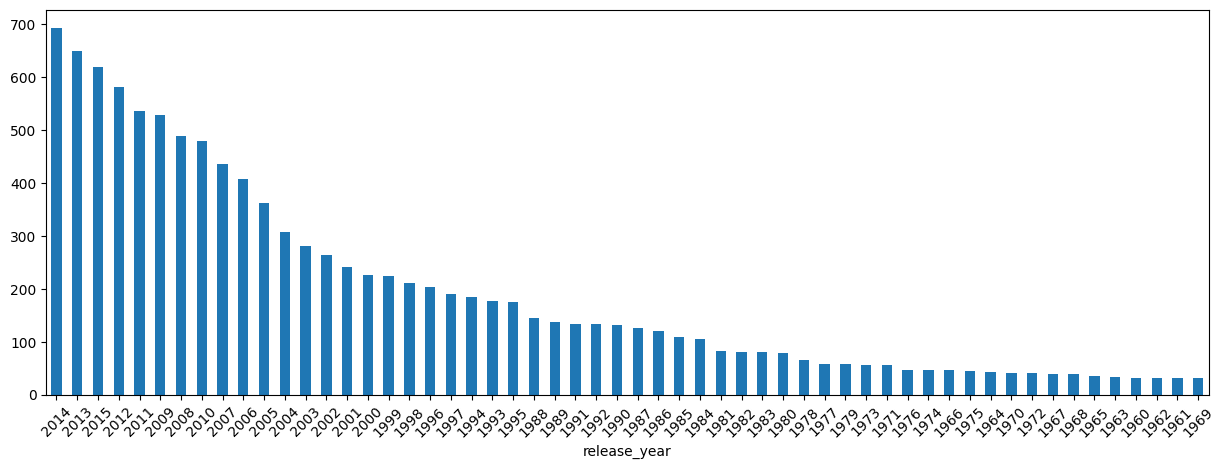

In [26]:
# Create a bar plot of the number of movies released per year
# Rotate x-axis labels for readability, and set the figure size
# 1-D Analysis
year_runtime_df['release_year'].value_counts().plot(kind='bar', rot=45, figsize=(15, 5))

Text(0.5, 1.0, 'Avg Runtime by Release Year')

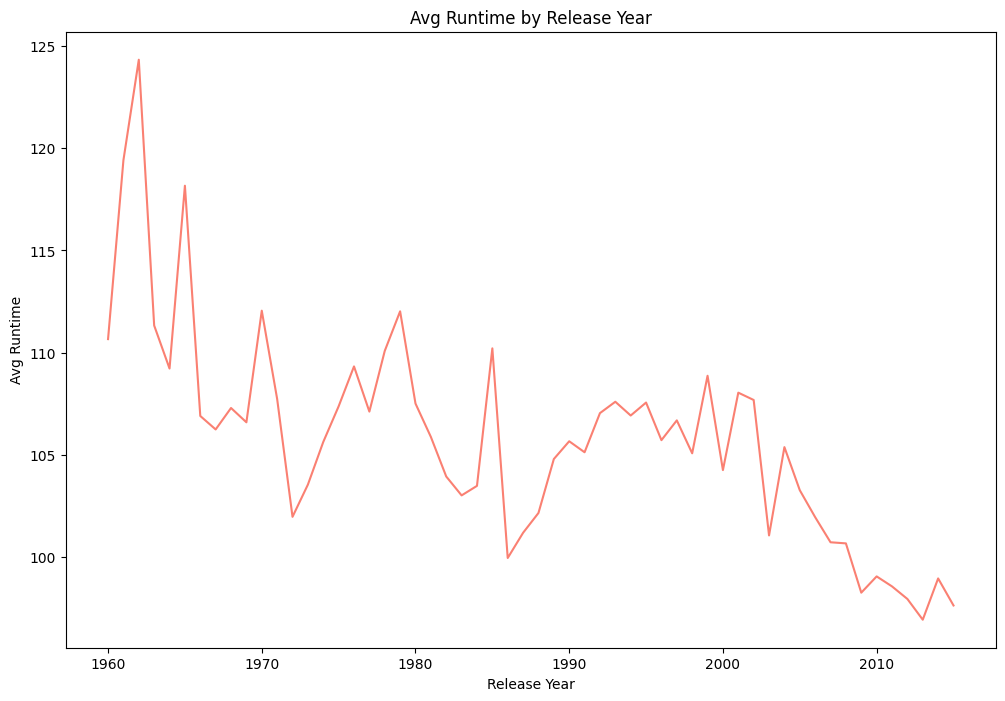

In [27]:
# Create a line plot of the average runtime by release year
# Set the figure size, line color, and add labels and a title
# 2-D Analysis
plt.figure(figsize=(12, 8))
plt.plot(year_avg_runtime['release_year'], year_avg_runtime['runtime'], color='salmon')
plt.xlabel('Release Year')
plt.ylabel('Avg Runtime')
plt.title('Avg Runtime by Release Year')

### Research Question 2  (Does the runtime have an impact on popularity?)

In [28]:
# Create a new DataFrame with only the 'runtime' and 'popularity' columns from the original movies_df
popularity_runtime_df = movies_df[['runtime', 'popularity']].copy()
popularity_runtime_df

,runtime,popularity
0,124,32.985763
1,120,28.419936
2,119,13.112507
3,136,11.173104
4,137,9.335014
...,...,...
10861,95,0.080598
10862,176,0.065543
10863,94,0.065141
10864,80,0.064317


In [29]:
# Group the DataFrame by 'runtime' and calculate the mean of 'popularity' for each runtime value
runtime_avg_popularity = popularity_runtime_df.groupby('runtime')['popularity'].mean()

# Reset the index of the grouped DataFrame to make 'runtime' a column again
runtime_avg_popularity = runtime_avg_popularity.reset_index()

# Sort the DataFrame by 'popularity' in ascending order
runtime_avg_popularity = runtime_avg_popularity.sort_values(by='popularity', ascending=True)

# Display the average popularity by runtime
runtime_avg_popularity

,runtime,popularity
229,360,0.001315
224,294,0.001531
17,19,0.003731
244,900,0.006925
47,53,0.013131
...,...,...
159,165,2.970531
191,200,3.264571
192,201,3.687482
187,194,4.355219


<Axes: ylabel='runtime'>

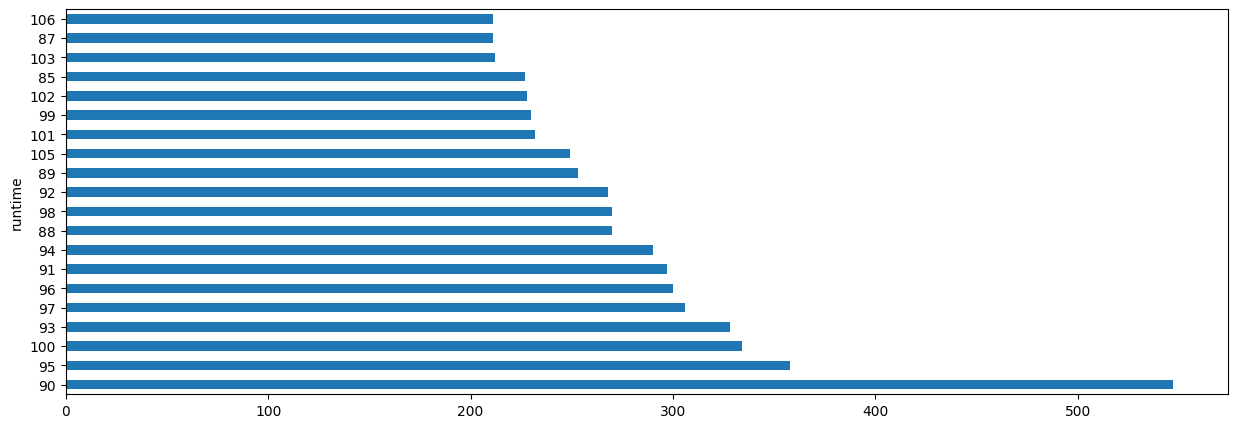

In [30]:
# Create a horizontal bar plot of the top 20 most common runtime values in the dataset
# The plot will display the count of movies for each runtime
# 1-D Analysis
popularity_runtime_df['runtime'].value_counts().iloc[:20].plot(kind='barh', figsize=(15, 5))

Text(0.5, 1.0, 'Avg Popularity by Runtime')

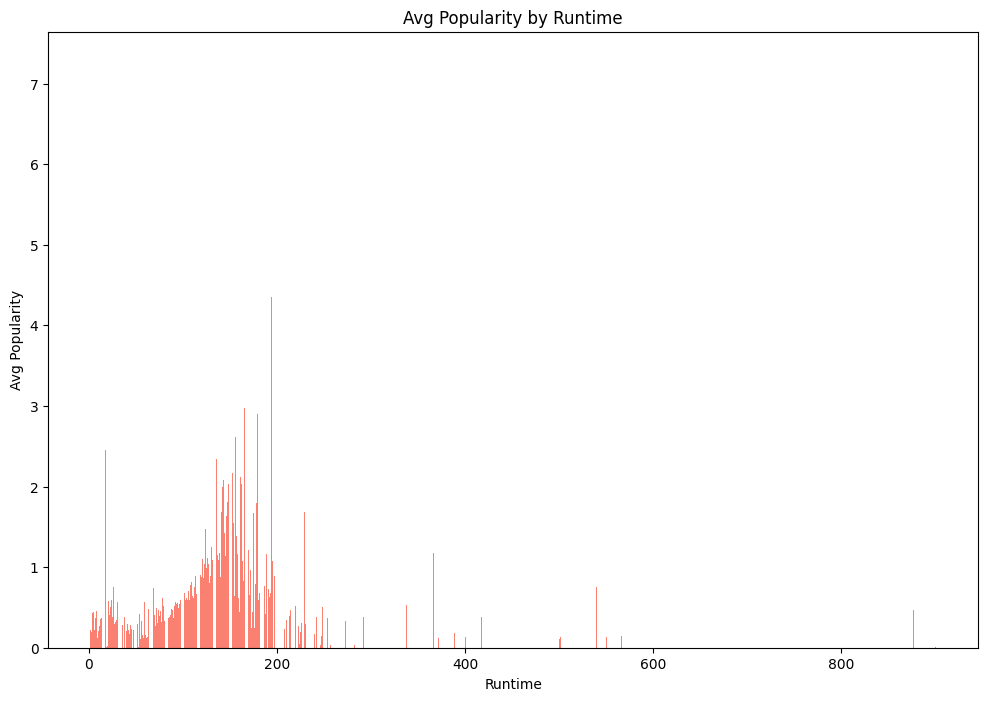

In [31]:
# Create a bar plot showing the average popularity by runtime
# Set the figure size, bar color, and add labels and a title
# 2-D Analysis
plt.figure(figsize=(12, 8))
plt.bar(runtime_avg_popularity['runtime'], runtime_avg_popularity['popularity'], color='salmon')
plt.xlabel('Runtime')
plt.ylabel('Avg Popularity')
plt.title('Avg Popularity by Runtime')

<a id='conclusions'></a>

## Conclusions

In this analysis, we explored how the release year affects movie runtimes and whether a movie's length impacts its popularity. We found that runtimes have generally decreased in recent years, possibly due to shifts in audience preferences or production strategies. However, runtime alone does not significantly influence a movie’s popularity, other factors like cast and storyline seem to play a larger role, but the average popularity with runtimes between `100` and `200` minutes is the highest, so we could say that the runtime is a one of the factors affect the popularity.

***Limitation:***
A limitation of our study is that recent movies are more represented in the data, which might skew some results.
Because there are fewer older movies, it might create a bias in the analysis, making recent trends appear stronger than they actually are. This uneven representation could affect the accuracy of results.